In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from networkx import karate_club_graph, to_numpy_matrix
#from scipy.csr

#### Zachary’s karate club - Graphical Data
This is a commonly used social network where nodes represent 
members of a karate club and the edges their mutual relations. 

In [2]:
#Importing vanilla karate club daya
zkc = karate_club_graph()
order = sorted(list(zkc.nodes()))

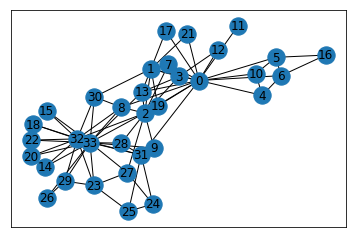

In [3]:
#Plotting the networkx graphs
nx.draw_networkx(zkc)

In [4]:
#Build the adjacency matrix for the graph
A = to_numpy_matrix(zkc, nodelist=order)

#Building the Identity matrix
I = np.eye(zkc.number_of_nodes())

In [6]:
A

matrix([[0., 1., 1., ..., 1., 0., 0.],
        [1., 0., 1., ..., 0., 0., 0.],
        [1., 1., 0., ..., 0., 1., 0.],
        ...,
        [1., 0., 0., ..., 0., 1., 1.],
        [0., 0., 1., ..., 1., 0., 1.],
        [0., 0., 0., ..., 1., 1., 0.]])

In [7]:
#Adding with adjacency matrix to have it's features also
A_hat = A + I

#Creating Degree Matrix
D_hat = np.array(np.sum(A_hat, axis=0))[0]
D_hat = np.matrix(np.diag(D_hat))

In [14]:
D_hat


matrix([[17.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0., 10.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0., 11., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  7.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0., 13.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0., 18.]])

In [41]:
#Random Initialization of the weight

W_1 = np.random.normal(
    loc=0, scale=1, size=(zkc.number_of_nodes(), 4))

W_2 = np.random.normal(
    loc=0, size=(W_1.shape[1], 2))


In [42]:
print (W_1.shape)
print (W_2.shape)


(34, 4)
(4, 2)


In [43]:
def relu(m):
   return np.maximum(m, 0)

In [44]:
def gcn_layer(A_hat, D_hat, X, W):
    return relu(D_hat**-1 * A_hat * X * W)

H_1 = gcn_layer(A_hat, D_hat, I, W_1)
H_2 = gcn_layer(A_hat, D_hat, H_1, W_2)


output = H_2

In [45]:
feature_representations = {}

for node in zkc.nodes():
    feature_representations[node]= np.array(output)[node] 
    

(-0.552273766127691,
 0.37619823714585005,
 -1.0935923133348922,
 0.8886621797124119)

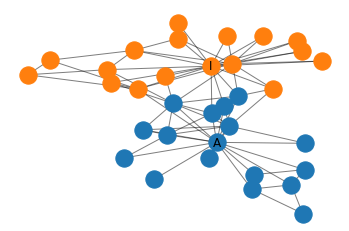

In [46]:
from networkx import (
    karate_club_graph,
    spring_layout, draw_networkx_nodes, draw_networkx_edges, draw_networkx_labels,
    set_node_attributes,
    write_edgelist
)
import matplotlib.pyplot as plt
from csv import DictWriter
zkc = karate_club_graph()

pos = spring_layout(zkc)

administrator = set(
    n -1 for n in (1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 17, 18, 20, 22))
instructor = set(node for node in zkc.nodes() if node not in administrator)

draw_networkx_nodes(zkc, pos, nodelist=[0], node_size=300, node_color='C0')
draw_networkx_nodes(zkc, pos, nodelist=list(administrator - set([0])), node_color='C0')

draw_networkx_nodes(zkc, pos, nodelist=[33], node_size=300, node_color='C1')
draw_networkx_nodes(zkc, pos, nodelist=list(instructor - set([33])), node_color='C1')

#draw_networkx_nodes(zkc, pos, node_color='lightblue')
draw_networkx_edges(zkc, pos,width=1.0,alpha=0.5)

labels = {33: 'I', 0: 'A'}
draw_networkx_labels(zkc, pos, labels, font_size=12)
plt.axis('off')
#plt.savefig('../reports/figures/karateclub_visualised.pdf')


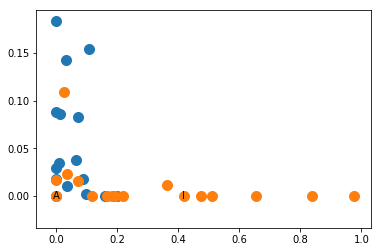

In [47]:
import matplotlib.pyplot as plt
embedding = {node: np.array(output)[node] for node in zkc.nodes()}

s=100
plt.scatter(*embedding[0], c='C0', s=s)
plt.annotate('A', xy=embedding[0], ha='center', va='center')
x, y = zip(*[embedding[node] for node in administrator - set([0])])
plt.scatter(x, y, c='C0', s=s)

plt.scatter(*embedding[33], c='C1', s=s)
plt.annotate('I', xy=embedding[33], ha='center', va='center')
x, y = zip(*[embedding[node] for node in instructor- set([33])])
plt.scatter(x, y, c='C1', s=s)
#plt.savefig('../reports/figures/randomly_initialized_2layer_GCN_on_karate_club.pdf')